In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
import os
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
import seaborn as sns
import timeit

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
test=pd.read_csv("../input/ece-657a-w20-asg3-part-1/testX.csv")
train=pd.read_csv("../input/ece-657a-w20-asg3-part-1/train.csv")
sample=pd.read_csv("../input/ece-657a-w20-asg3-part-1/samplesubmission.csv")

/kaggle/input/ece-657a-w20-asg3-part-1/train.csv
/kaggle/input/ece-657a-w20-asg3-part-1/testX.csv
/kaggle/input/ece-657a-w20-asg3-part-1/samplesubmission.csv


In [2]:
test

,Id,0,1,2,3,4,5,6,7,8,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,1,0,0,0,...,119,114,130,76,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,33,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,9996,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,9997,0,0,0,0,0,0,0,1,0,...,169,131,0,0,0,0,0,0,0,0
9998,9998,0,0,0,1,0,0,0,0,24,...,85,104,138,51,0,3,0,0,0,0


In [3]:
train

,Id,Label,1,2,3,4,5,6,7,8,...,775,776,777,778,779,780,781,782,783,784
0,10000,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,10001,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,10002,0,0,0,0,0,0,0,0,0,...,31,9,0,0,0,0,0,0,0,0
3,10003,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,10004,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,69995,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,69996,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,69997,4,0,0,0,0,0,0,0,0,...,27,0,0,0,0,0,0,0,0,0
59998,69998,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
X=train.iloc[:,2:786]
y=train.iloc[:,1]

In [5]:
sample.head()

,Id,Label
0,0,3
1,1,3
2,2,3
3,3,3
4,4,3


In [6]:
train['Label'].unique()

array([4, 0, 1, 2, 3])

In [7]:
y

0        4
1        0
2        0
3        4
4        1
        ..
59995    3
59996    0
59997    4
59998    0
59999    2
Name: Label, Length: 60000, dtype: int64

> # NORMALIZING



X

In [8]:
X

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,31,9,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,0,0,0,0,0,0,0,0,0,31,...,0,0,0,0,0,0,0,0,0,0
59997,0,0,0,0,0,0,0,0,0,0,...,27,0,0,0,0,0,0,0,0,0
59998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
# scaler=StandardScaler() #can also be done by dividing by 255.
# scaler=scaler.fit(X_train)
# X_train_normalized=scaler.transform(X_train)
# X_test_normalized=scaler.transform(X_test)
X_normalized=X/255;

In [10]:
X_normalized

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003922,0.000000,...,0.121569,0.035294,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.121569,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.105882,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# APPLYING LDA

In [11]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda_4 = LDA(solver='svd') # svd for large no. of features.
lda_transformed_train=lda_4.fit_transform(X_normalized, y) #feature extraction

In [12]:
lda_transformed_train=pd.DataFrame(lda_transformed_train)

In [13]:
lda_transformed_train

,0,1,2,3
0,1.416507,0.845682,2.448755,-2.689683
1,-2.240411,-0.384557,0.978988,-0.111109
2,-1.977967,-0.408524,0.553582,0.603046
3,2.764417,2.519599,1.726740,0.873993
4,-1.520178,-0.887940,0.494293,-0.767861
...,...,...,...,...
59995,1.588443,-1.775923,-2.286764,-0.479396
59996,-3.476857,0.747639,-0.223132,0.657417
59997,0.959477,-0.093987,1.400663,-0.045810
59998,-3.827951,1.961441,-0.701571,-0.294758


# SPLIT

In [14]:
X_train,X_test,y_train,y_test=train_test_split(lda_transformed_train,y,test_size=0.2,random_state=42)

In [15]:
y_train=pd.DataFrame(y_train)
y_test=pd.DataFrame(y_test)

In [16]:
X_train=X_train.reset_index(drop=True)
X_test=X_test.reset_index(drop=True)
y_train=y_train.reset_index(drop=True)
y_test=y_test.reset_index(drop=True)

# preparing  the final test data

In [17]:
test
unlabelled_test=test.iloc[:,1:]

In [18]:
unlabelled_test


,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,119,114,130,76,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,22,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,33,96,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,1,0,0,...,169,131,0,0,0,0,0,0,0,0
9998,0,0,0,1,0,0,0,0,24,116,...,85,104,138,51,0,3,0,0,0,0


# Normalizing Test data


In [19]:
unlabelled_test_normalized=unlabelled_test/255
unlabelled_test_normalized=pd.DataFrame(unlabelled_test_normalized)
unlabelled_test_normalized

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.000000,0.003922,0.0,0.000000,0.000000,0.000000,...,0.466667,0.447059,0.509804,0.298039,0.000000,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.086275,...,0.000000,0.000000,0.003922,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.129412,0.376471,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
9996,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
9997,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.003922,0.000000,0.000000,...,0.662745,0.513725,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
9998,0.0,0.0,0.0,0.003922,0.000000,0.000000,0.0,0.000000,0.094118,0.454902,...,0.333333,0.407843,0.541176,0.200000,0.000000,0.011765,0.0,0.0,0.0,0.0


# FEATURE EXTRACTION LDA

In [20]:
unlabelled_test_components=lda_4.transform(unlabelled_test_normalized)
unlabelled_test_components=pd.DataFrame(unlabelled_test_components)
unlabelled_test_components

,0,1,2,3
0,1.857980,-1.594689,-1.334924,-0.313799
1,3.718277,1.030956,0.488152,0.649718
2,-2.580736,-0.672197,0.759247,-0.245104
3,-1.919221,-0.657884,1.505043,-0.278611
4,-0.734572,-0.295098,-0.467375,-0.161176
...,...,...,...,...
9995,0.250765,-1.251581,1.129069,-2.830013
9996,-2.111902,-1.014069,1.785855,-0.176525
9997,0.874649,0.521246,0.592403,0.625898
9998,-0.816669,-1.022837,0.358891,0.911543


# ----------------------------------------------------------------------------------

# SVM-------------------------------------------------------------

# Lda | Cross val score

## MEAN ACCURACY AT DIFFERENT C-VALUES


### Mean Accuracy:  0.7250666666666666 at c=  0.1   Time taken :: 276.540560767
### Mean Accuracy:  0.7266166666666667 at c=  0.5   Time taken :: 268.5633331739991
### Mean Accuracy:  0.7273666666666667 at c=  1   Time taken :: 269.9936008980003
### Mean Accuracy:  0.7277333333333333 at c=  2   Time taken :: 276.58571360099995
### Mean Accuracy:  0.7280666666666666 at c=  3   Time taken :: 285.9288893030007
### Mean Accuracy:  0.7283000000000001 at c=  5   Time taken :: 299.5972977199999
### Mean Accuracy:  0.7287333333333333 at c=  10   Time taken :: 324.67334377899897













In [ ]:
c_list=[0.1,0.5,1,2,3,5,10] 

mean_accuracy_svm=[]
timetaken1=[]
print("\t\t MEAN ACCURACY AT DIFFERENT C-VALUES\n\n")
for k in c_list:
    start=timeit.default_timer()
    scores=[]
    clf_svm = SVC(kernel='rbf',C=k,degree=3,random_state=42)
    scores_svm=cross_val_score(clf_svm, lda_transformed_train, np.ravel(y), cv=5)
    # dividing the training data of 80% into ratio of 90:10 for multiple splits using one fold for testing at a time.
    stop=timeit.default_timer()
    
    print("Mean Accuracy: ",scores_svm.mean(),"at c= ",k,"  Time taken ::",stop-start)
    mean_accuracy_svm.append(scores_svm.mean())
    timetaken1.append(stop-start)

In [ ]:
df_svm=pd.DataFrame(data=list(zip(c_list,mean_accuracy_svm,timetaken1)),columns=['C values','Mean accuracy SVM','Timetaken SVM'])

In [ ]:
df_svm

In [ ]:
sns.swarmplot( x='C values',y='Mean accuracy SVM', data=df_svm)
plt.title("Accuracy vs C-Values")

# Thus best value of c is 10.

# Applying on val data  | Best parameters from cross val score | accuracy on val data =72.76

In [21]:
clf_svm1 = SVC(kernel='rbf', C=10,degree=3,random_state=42)
clf_svm1.fit(X_train, np.ravel(y_train))
y_pred_svm=clf_svm1.predict(X_test)
accscore_svm = accuracy_score(y_test,y_pred_svm)

In [22]:
print("Accuracy on 20% Test data after training on best parameters choosen from crossvalscore i.e c=::",accscore_svm)

Accuracy on 20% Test data after training on best parameters choosen from crossvalscore i.e c=:: 0.7276666666666667


# Confusion Matrix

In [23]:
from sklearn.metrics import confusion_matrix
con_mat = confusion_matrix(y_pred_svm, y_test)
print('Confusion Matrix:\n', con_mat)

Confusion Matrix:
 [[1992  264   32    0    3]
 [ 369 1726  559   43   39]
 [  15  378 1392  415   50]
 [   1   31  318 1590  342]
 [   2   25   63  319 2032]]


# Classification Report

In [24]:
from sklearn.metrics import classification_report
class_rep = classification_report(y_pred_svm, y_test, target_names = ['Class-0', 'Class-1', 'Class-2', 'Class-3', 'Class-4'])
print('Classification Report:\n', class_rep)

Classification Report:
               precision    recall  f1-score   support

     Class-0       0.84      0.87      0.85      2291
     Class-1       0.71      0.63      0.67      2736
     Class-2       0.59      0.62      0.60      2250
     Class-3       0.67      0.70      0.68      2282
     Class-4       0.82      0.83      0.83      2441

    accuracy                           0.73     12000
   macro avg       0.73      0.73      0.73     12000
weighted avg       0.73      0.73      0.73     12000



# ROC Curve

In [25]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score
y_labelized= label_binarize(y_test, classes=[0,1,2,3,4])

In [26]:
y_labelized

array([[0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0],
       ...,
       [0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0]])

In [27]:
y_labelized.shape

(12000, 5)

In [28]:
n_classes = y_labelized.shape[1]

In [29]:
ldsv1= OneVsRestClassifier(SVC(kernel='rbf', C=10,degree=3,random_state=42))
ldsv1.fit(X_train, y_train)

OneVsRestClassifier(estimator=SVC(C=10, break_ties=False, cache_size=200,
                                  class_weight=None, coef0=0.0,
                                  decision_function_shape='ovr', degree=3,
                                  gamma='scale', kernel='rbf', max_iter=-1,
                                  probability=False, random_state=42,
                                  shrinking=True, tol=0.001, verbose=False),
                    n_jobs=None)

In [31]:
prob = ldsv1.decision_function(X_test)

In [32]:
prob

array([[-0.78173479,  0.62966978, -1.20805488, -1.39368351, -1.18362266],
       [ 0.62819012, -1.24228004, -1.04913425, -1.88413092, -1.07856585],
       [-2.56066812, -1.11155048,  0.27451302, -0.22008906, -1.04613657],
       ...,
       [-2.15741651, -1.59213342, -1.387795  , -1.24492767,  1.31774462],
       [-1.29889372,  1.17435834, -1.01603151, -1.03079986, -1.78772137],
       [ 0.81657777, -1.18917514, -1.01171005, -1.97488065, -1.03355838]])

In [33]:
prob.shape

(12000, 5)

### y_labelized is labelized y_test i.e labelized val data

### "Distance of the samples X to the separating hyperplane."

In [34]:
f_p_r = dict()
t_p_r = dict()
roc_auc = dict()

for j in range(n_classes):
    f_p_r[j], t_p_r[j], _ = roc_curve(y_labelized[:, j], prob[:, j])
    roc_auc[j] = auc(f_p_r[j], t_p_r[j])

In [35]:
print('fpr 0',f_p_r[0].shape)
print('fpr 1',f_p_r[1].shape)
print('fpr 2',f_p_r[2].shape)
print('fpr 3',f_p_r[3].shape)
print('fpr 4',f_p_r[4].shape)
print("\n\n")
print('tpr 0',t_p_r[0].shape)
print('tpr 1',t_p_r[1].shape)
print('tpr 2',t_p_r[2].shape)
print('tpr 3',t_p_r[3].shape)
print('tpr 4',t_p_r[4].shape)

fpr 0 (1000,)
fpr 1 (2268,)
fpr 2 (2539,)
fpr 3 (2052,)
fpr 4 (1190,)



tpr 0 (1000,)
tpr 1 (2268,)
tpr 2 (2539,)
tpr 3 (2052,)
tpr 4 (1190,)


In [36]:
print('roc_auc[0]',roc_auc[0])
print('roc_auc[1]',roc_auc[1])
print('roc_auc[2]',roc_auc[2])
print('roc_auc[3]',roc_auc[3])
print('roc_auc[4]',roc_auc[4])

roc_auc[0] 0.9724189925542498
roc_auc[1] 0.888160565743291
roc_auc[2] 0.8587621574201089
roc_auc[3] 0.9082331274723633
roc_auc[4] 0.938653669770426


### https://stackoverflow.com/questions/20113206/scikit-learn-svc-decision-function-and-predict

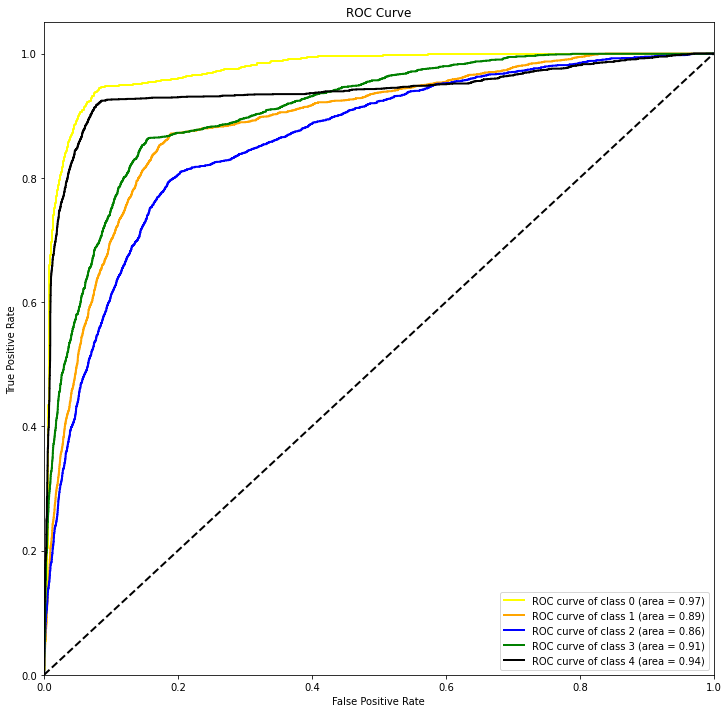

In [51]:
from itertools import cycle
p=2

plt.figure(figsize=(12,12))
colors = cycle(['yellow', 'orange', 'blue', 'green', 'black'])
for i, color in zip(range(n_classes), colors):
    plt.plot(f_p_r[i], t_p_r[i], color=color, lw=p,label='ROC curve of class {0} (area = {1:0.2f})'''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=p)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# TRAINING ON WHOLE DATASET AND TESTING THE UNLABELLED DATA-

In [42]:
# Training 
start=timeit.default_timer()

clf_svm2 = SVC(kernel='rbf', C=10,degree=3,random_state=42)
clf_svm2.fit(lda_transformed_train,np.ravel(y))
y_pred_svm1=clf_svm2.predict(unlabelled_test_components)

stop=timeit.default_timer()

In [43]:
print('Time Taken',stop-start)

Time Taken 96.43273292500089


In [44]:
submission_svm_10=y_pred_svm1

In [45]:
submission_svm_10=pd.DataFrame(submission_svm_10)
submission_svm_10=pd.DataFrame.reset_index(submission_svm_10)
submission_svm_10.columns=['Id','Label']

In [46]:
submission_svm_10

,Id,Label
0,0,3
1,1,4
2,2,0
3,3,1
4,4,1
...,...,...
9995,9995,1
9996,9996,1
9997,9997,2
9998,9998,2


In [47]:
#Convert DataFrame to a csv file that can be uploaded
#This is saved in the same directory as your notebook
filename = 'submission_svm_10.csv'
submission_svm_10.to_csv(filename,index=False)
print('Saved file:' + filename)

Saved file:submission_svm_10.csv


# As LDA resulted in a bad model. Let's see the separation between the classes.

In [48]:
lda_transformed_train['Label']=y

In [49]:
lda_transformed_train

,0,1,2,3,Label
0,1.416507,0.845682,2.448755,-2.689683,4
1,-2.240411,-0.384557,0.978988,-0.111109,0
2,-1.977967,-0.408524,0.553582,0.603046,0
3,2.764417,2.519599,1.726740,0.873993,4
4,-1.520178,-0.887940,0.494293,-0.767861,1
...,...,...,...,...,...
59995,1.588443,-1.775923,-2.286764,-0.479396,3
59996,-3.476857,0.747639,-0.223132,0.657417,0
59997,0.959477,-0.093987,1.400663,-0.045810,4
59998,-3.827951,1.961441,-0.701571,-0.294758,0


Text(0.5, 1.0, 'LDA')

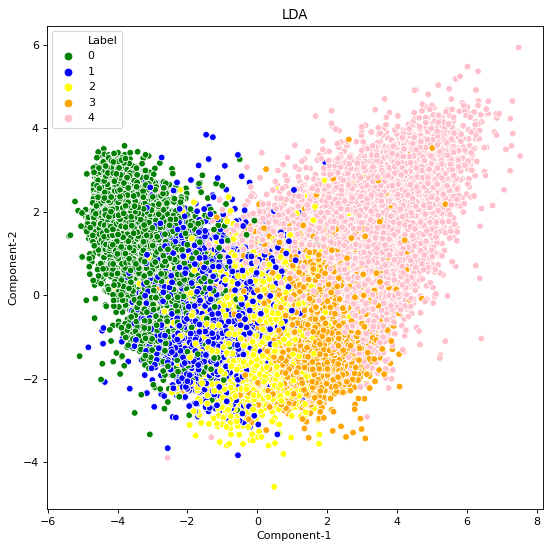

In [50]:
fig=plt.figure(figsize=(8, 8), dpi= 80)
sns.scatterplot(x=lda_transformed_train[0],y=lda_transformed_train[1],hue=lda_transformed_train.Label,legend='full',palette=['green','blue','yellow','orange','pink'])
plt.xlabel('Component-1')
plt.ylabel('Component-2')
plt.title('LDA')